# Nombre: Sebastián Urbina

# CC3001 Otoño 2020 Tarea 6: Comparación de métodos de hashing


Profesores: Sección 1 Benjamin Bustos, Seccion 2 Jérémy Barbay, Sección 3 Patricio Poblete y Nelson Baloian


## Temas abordados

1. [ ] Hashing Abierto
1. [ ] Búsqueda binaria


## Objetivos de aprendizaje


Despues de realizar esta tarea, el alumno debería
1. [ ] tener un mejor entendimiento de cómo funciona la técnica de Hashing  en sus modalidad de encadenamiento para resolver colisiones  y cómo se comporta empíricamente;


## Entrega

Entrega: Para que su tarea sea evaluada, ustedes deben entregar una copia de este Python Notebook completado con texto (explicaciones de su trabajo), el código de sus funciones y de sus pruebas (al menos 10 por cada función).


---

# Instrucciones

## Lo pedido

En esta tarea Usted debe implementar y comparar la eficiencia de Hashing con encadenamiento (listas enlazadas), versus búsqueda binaria. Para eso se le pide primero que complete la clase Hashing, que implementa una tabla de hashing que resuelve las colisiones con encadenamiento (puede además definir otras clases auxiliares):

In [3]:
class Nodo:
    def __init__(self, info, sgte=None):
        self.info=info
        self.sgte=sgte
        
class Lista:
    def __init__(self, primero = None):
        self.primero=primero

    def insertar(self, info):
        self.primero=Nodo(info, self.primero)
        
    def esta(self, x):
        """
        Retorna True o Flase si x está en la lista enlazada más el numero de comparaciones que realizó
        """
        comp = 1 #nro comparaciones
        p  = self.primero
        while p is not None:
            if p.info == x:
                return True,comp
            p = p.sgte
            comp+=1
        return False,comp

In [4]:
import random, sympy, numpy
class Hashing:
  def __init__ (self,m):
     # Inicializacion de tabla de tamaño m 
     self.m = m  # tamaño de la tabla
     self.p = sympy.randprime(100000,1000000) #Genera un numero primo al azar dentro del rango especificado
     self.a = random.randint(1,self.p) # genera un numero entero al azar dentro del rango especificado
     self.tabla=numpy.full(m, None, dtype=object) #Crea un arreglo que puede contener objetos (punteros a ellos)

  def h(self,x): 
    # retorna el valor hashing para x = ((a*x)mod PRIME)mod m
    return  ((self.a*x)%self.p)%self.m
    
  def insertar(self,x):
    # inserta un elemento en la tabla
    i = self.h(x) #indice 
    tabla = self.tabla
    if tabla[i] == None: #Si la posición está vacía entonces insertamos una lista enlazada
        tabla[i] = Lista()
        tabla[i].insertar(x)
    else: #Si la posición no está vacia significa que hay una lista enlazada, por lo que insertamos el valor a la lista
        tabla[i].insertar(x)
    
  def buscar(self,x):
    # retorna el numero de COMPARACIONES que hizo para determinar si  
    # x estaba o no en la tabla 
    i = self.h(x) 
    tabla = self.tabla
    if tabla[i] is None:
        return 1 #Si el espacio es vacío, significa que x no está, por tanto retornamos 1(la única comparación realizada)
    b, comp = tabla[i].esta(x) #Buscamos en nro en la lista enlazada correspondiente, lo que devuelve el nro de comparaciones a realizar
    return comp+1

Ademas debe modificar la búsqueda binaria (VERSION OPTIMIZADA, descrita en el Capítulo 4 Sección "Una manera más eficiente de programar la búsqueda binaria") para que devuelva el número de comparaciones realizadas durante la búsqueda.

In [5]:
def bbin(x, a):
    """
    Busca x en el arreglo a, retorna subíndice o -1 si no está
    """
    n = len(a)
    i = 0
    j = n - 1
    c = 1 #agregamos un contador de comparaciones
    while i < j:
        k = (i+j)//2
        c += 1 #contamos 1 por cada vez q entra al while, es decir, cada vez q realiza una comparación
        if x <= a[k]:
            j = k
        else:
            i = k + 1
    # if i == j and x == a[i]:
    #     return i
    # else:
    #     return -1
    return c

Luego escriba el codigo necesario para realizar los siguientes experimentos y mostrar los resultados en graficos usando *%pylab inline*, como se ha visto en ejemplos en los apuntes del curso: 

1.   Crear un conjunto de $n=100.000$ numeros enteros únicos (sin repeticion) entre $0$ y $100.000.000$ y ponerlos en un arreglo ordenado y en una tabla de hashing de tamaño $m=10.000$. Para ordenar el arreglo puede usar el método *sort()*.
2.   Generar $t=1.000$ números entre $0$ y $100.000.000$ y registrar el número de comparaciones promedio que se obtiene al buscarlos en el arreglo con busqueda binaria ($c1$) y con la tabla de hashing ($c2$).
3.   Repetir el experimento anterior para $n$ variable (a lo menos $10$ veces), de modo de encontrar el factor de carga para el cual el los resultados de la busqueda binaria y la busqueda con hashing encadenado en una tabla de tamaño $10.000$ sean iguales. Recuerde que el factor de carga se define como $n/m$, con $n=$ numero de elementos en la tabla, y $m=$ tamaño de la tabla (queda fijo $m =$ 10.000 para esta tarea).
4.   Para mostrar gráficamente ese punto, con los resultados de los experimentos pedidos en el punto anterior confeccione un grafico con curvas uniendo los puntos $n$ vs. $c1$ y $n$ vs. $c2$.

In [8]:
import numpy as np

c1 = []
c2 = []

ns = [1000,5000,10000,15000,20000,25000,50000,100000,500000,750000]
for r in ns:
    c1_aux = []
    c2_aux = []
    n = np.random.choice(range(100000000), r, replace = False) #arreglo con r valores aleatorios únicos entre 0 y 100.000.000
    n.sort() #lo ordenamos

    c = Hashing(10000) #agregamos a la tabla de Hashing
    for i in n:
        c.insertar(i)

    t = np.random.choice(range(100000000), 1000, replace = False) #arreglo con 1.000 valores aleatorios únicos entre 0 y 100.000.000
    
    for i in t:
        c1_aux.append(bbin(i, n)) #obtenemos el nro de comparaciones al buscr los valores de t en n con busqueda binaria
    c1.append(np.mean(c1_aux)) #calculamos el promedio al buscar los t valores y agregamos el promedio a c1.

    for i in t:
        c2_aux.append(c.buscar(i)) #utilizando Hashing, obtenemos el nro de comparaciones necesarias para buscar los valores de t en la tabla creada anteriormente
    c2.append(np.mean(c2_aux)) #de los t valores calculamos el promedio y lo agregamos a c2

Populating the interactive namespace from numpy and matplotlib


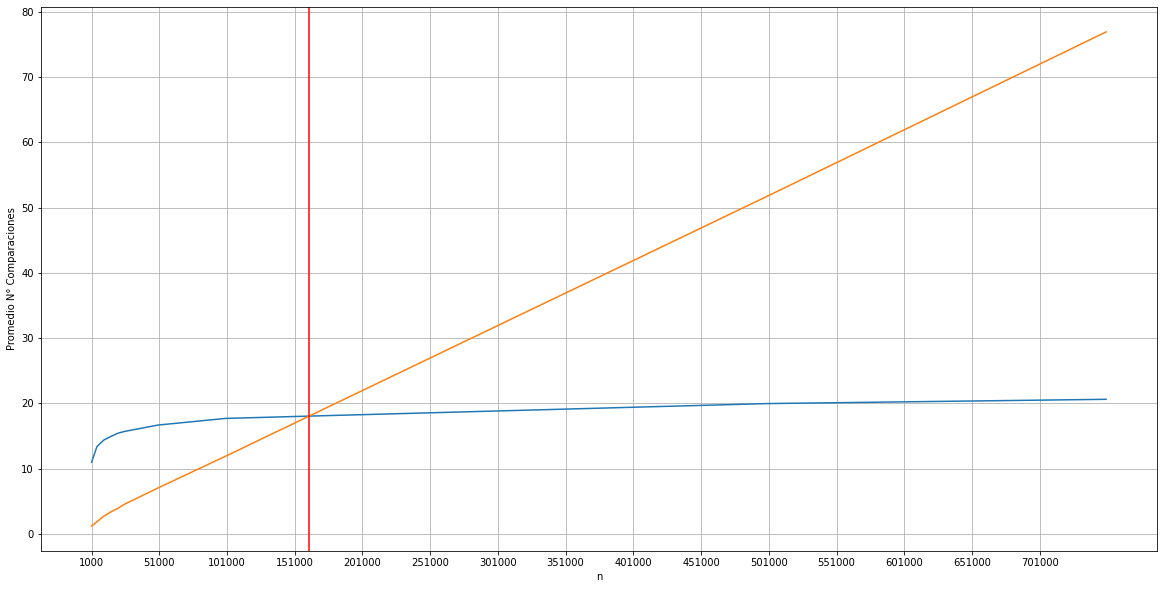

In [59]:
%pylab inline

plt.figure(figsize=(20,10))
ns = [1000,5000,10000,15000,20000,25000,50000,100000,500000,750000]
plt.plot(ns, c1)
plt.plot(ns, c2)
plt.xlabel("n")
plt.ylabel("Promedio N° Comparaciones")
plt.grid(True)
plt.xticks(np.arange(min(ns), max(ns), 50000))
plt.axvline(x=161500, c= "red")
plt.show()

Se puede observar que el punto de corte da alrededor de $n = 161.000$